In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r'..\data\final_train_data.csv')

In [3]:
test = pd.read_csv(r'..\data\final_test_data.csv')

In [4]:
# train['Survived']

In [5]:
train.shape

(891, 41)

In [6]:
test.shape

(418, 40)

## `Splitting into X_train and Y_train`

### Training Data

In [7]:
X= train.drop(labels='Survived',axis=1)

In [8]:
X.shape

(891, 40)

In [9]:
y= train['Survived']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## `QQ Plot and Transformation`

In [12]:
import scipy.stats as stats

### Training Data

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


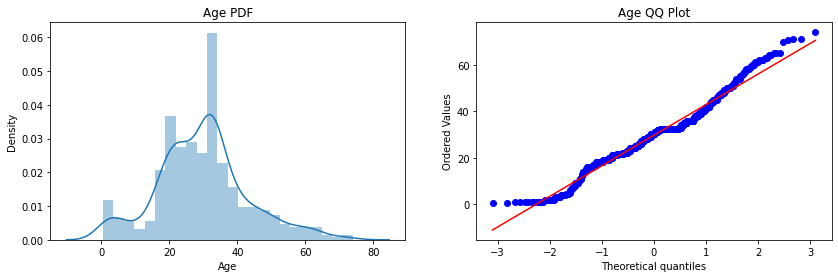

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


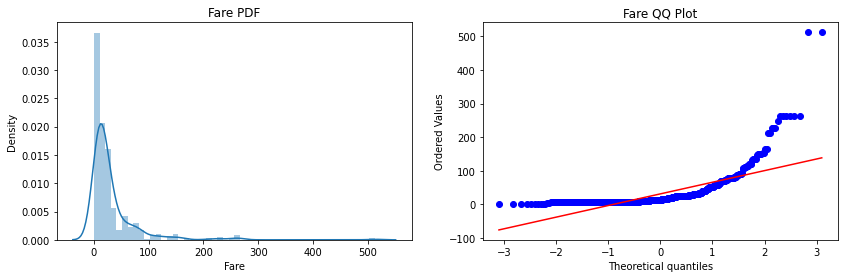

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [15]:
from sklearn.preprocessing import FunctionTransformer

In [16]:
trf = FunctionTransformer(np.log1p)

In [17]:
X_train['Fare']=trf.fit_transform(X_train['Fare'])

In [18]:
X_train['Age']=trf.fit_transform(X_train['Age'])

In [19]:
X_test['Fare']=trf.transform(X_test['Fare'])

In [20]:
X_test['Age']=trf.transform(X_test['Age'])

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


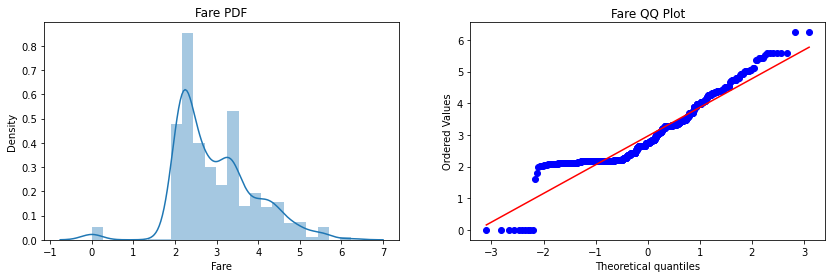

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


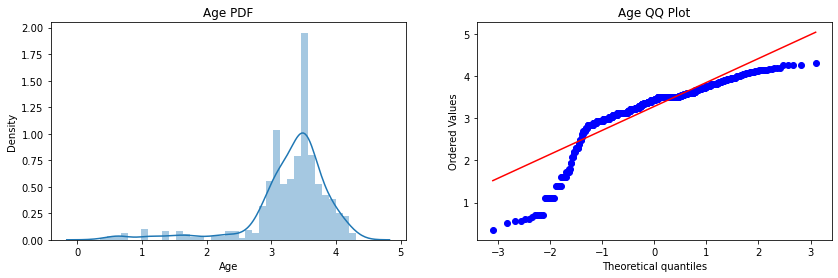

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

### Test Data

In [23]:
test['Fare']=trf.fit_transform(test['Fare'])

In [24]:
test['Age']=trf.fit_transform(test['Age'])

## `Scaling`

In [25]:
from sklearn.preprocessing import StandardScaler

### Training Data

In [26]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Test Data

In [27]:
scaled_test = scaler.transform(test)

## `Apply Logistic Regression model with Transformation on Fare column`


In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [29]:
log_model.coef_.shape

(1, 40)

In [30]:
log_model.coef_

array([[-2.83220472e-01,  5.37314642e-01,  9.63090494e-03,
        -4.13519363e-01,  4.41909710e-02,  3.95942180e-02,
         6.36339794e-02, -2.55652584e-01, -4.50319755e-01,
        -1.29106172e-01, -5.42680420e-01, -4.97577215e-01,
        -8.80836658e-01,  3.53359279e-01, -1.78831221e-04,
        -1.55802918e-01,  5.19094050e-02,  9.63015414e-02,
         1.41028833e-01, -5.68469189e-02,  5.66713129e-01,
        -3.72695586e-02, -5.52975964e-01,  1.82673913e-01,
         1.41798194e-01, -3.87930940e-01,  1.57235674e-01,
        -1.30118818e-01,  1.55066922e-01,  2.47271137e-01,
        -2.70847437e-02, -8.38224313e-02, -2.97633249e-01,
         1.64371685e-01,  1.61368953e-01,  2.32772855e-01,
         5.83813795e-02, -4.09003469e-02, -8.43846705e-02,
        -2.62042697e-01]])

## `Calculate Accuracy`

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.8212290502793296

In [32]:
confusion_matrix(y_test,y_pred)

array([[88, 11],
       [21, 59]], dtype=int64)

c:\Users\kul78\.conda\envs\data_science\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


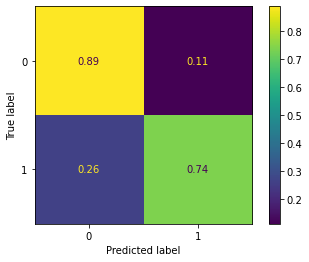

In [33]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

## `Predicting the Test Data`

In [34]:
test_pred = log_model.predict(scaled_test)

In [35]:
submission = pd.read_csv(r'..\Kagle_submissions\gender_submission.csv')

In [36]:
submission["Survived"]=test_pred

In [37]:
submission.shape

(418, 2)

In [38]:
submission.to_csv(r"..\Kagle_submissions\Logistics_Reg_Transformation.csv",index=False)